In [1]:
import numpy as np
import sklearn
import tensorflow as tf

# print("NumPy:", np.__version__)
# print("scikit-learn:", sklearn.__version__)
# print("TensorFlow:", tf.__version__)


In [2]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [3]:
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"] 
df = pd.read_csv(r"magic04.data", names=cols)

In [4]:
df.head()#We can see we don't have labels in these, so we are gonna add labels to them

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [5]:
df["class"].unique()#g-> Gamma, h-> Hydrones
#converting this 0-> g and 1 -> h

array(['g', 'h'], dtype=object)

In [6]:
df["class"] = (df["class"] == "g").astype(int)

In [7]:
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


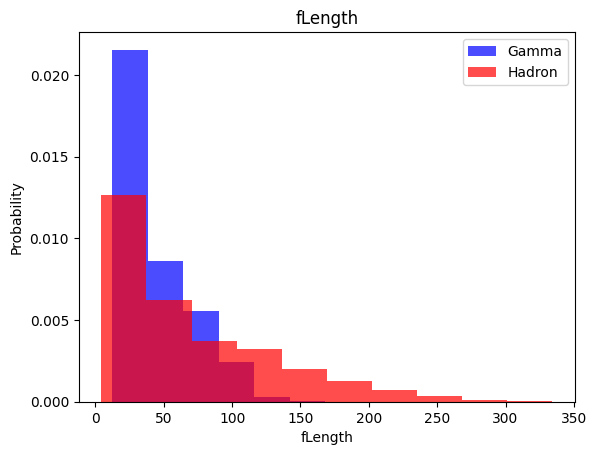

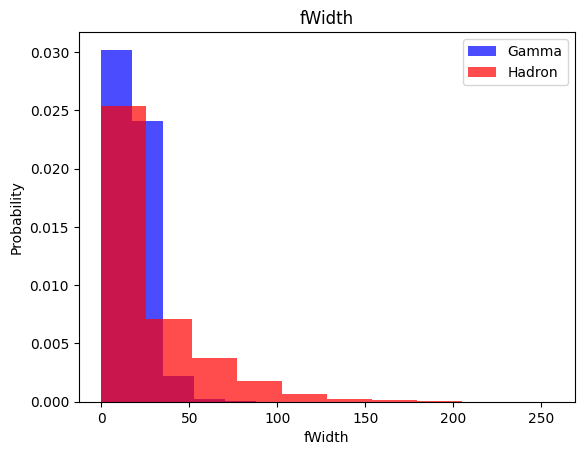

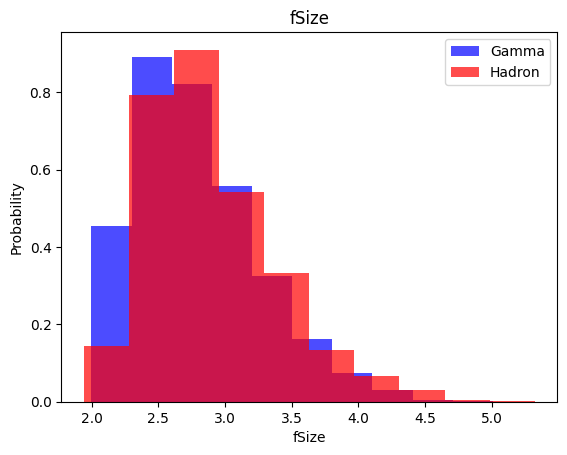

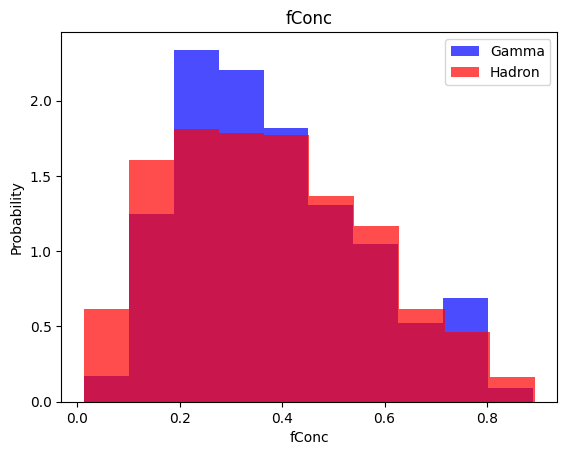

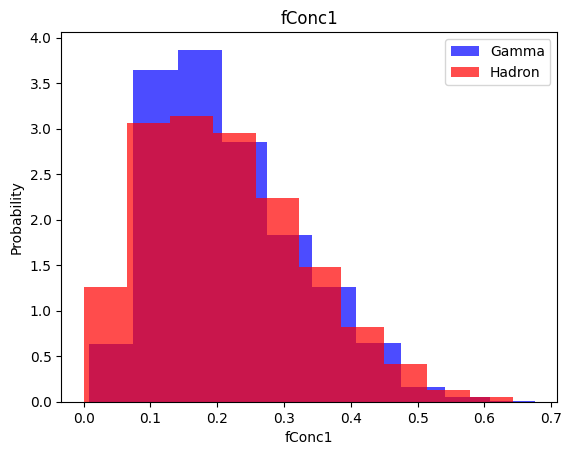

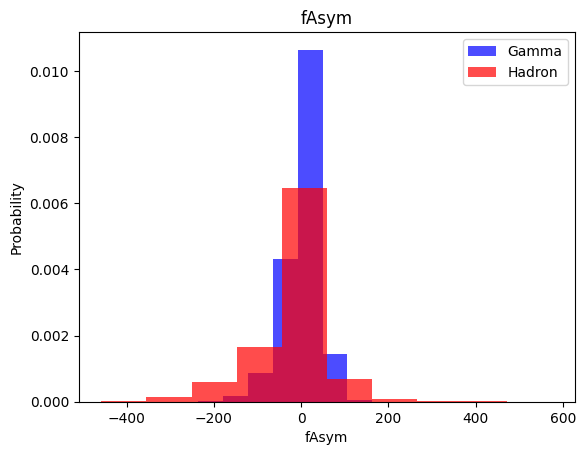

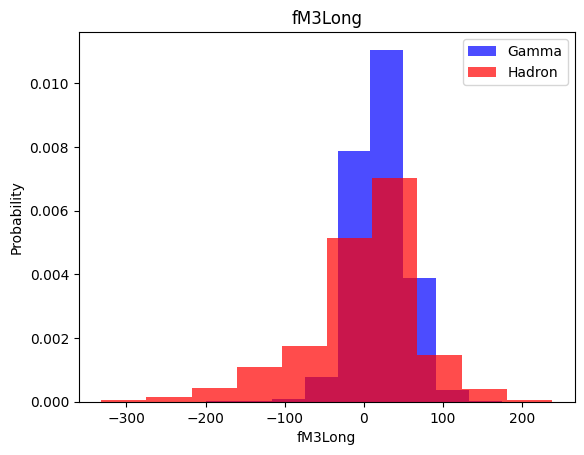

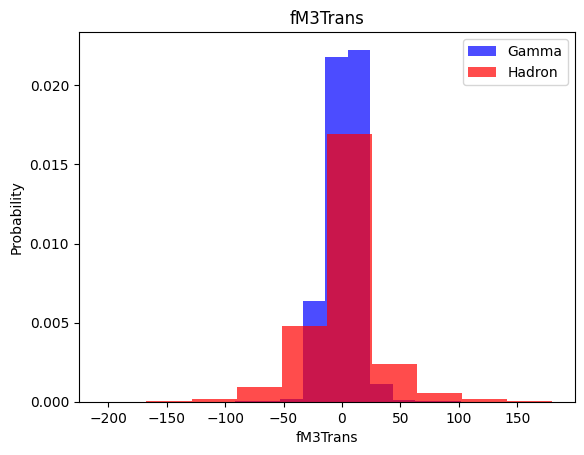

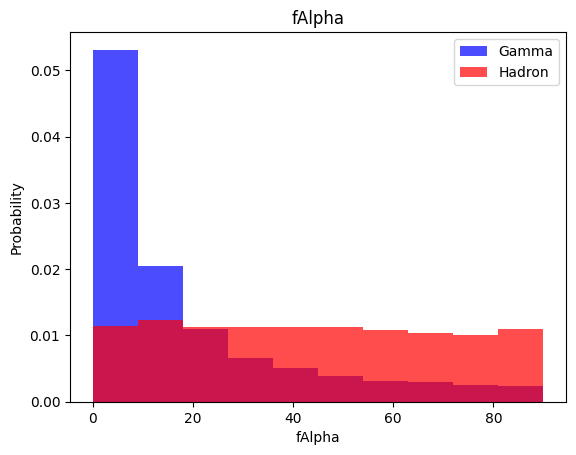

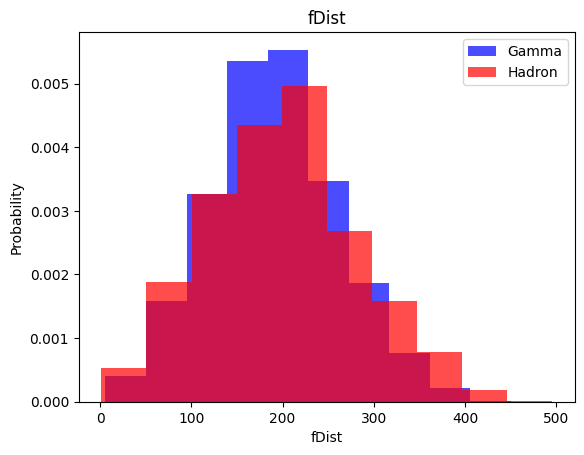

In [8]:
for label in cols[:-1]:
    plt.hist(df[df["class"] == 1][label], color="blue", label="Gamma", alpha=0.7, density=True)
    plt.hist(df[df["class"] == 0] [label], color="red", label="Hadron", alpha=0.7, density=True)
    plt.title(label)
    plt.ylabel("Probability")
    plt.xlabel(label)
    plt.legend()
    plt.show()

# Creating Train, Testing and Validation Datasets

In [9]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [10]:
def scale_dataset(dataframe, oversample=False):
    X = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values

    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    if oversample:
        ros = RandomOverSampler()
        X,y  = ros.fit_resample(X, y)
    
    data = np.hstack((X, np.reshape(y, (-1, 1))))
    
    return data, X, y

In [11]:
train

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
8990,26.2738,11.9961,2.6085,0.4507,0.2426,24.7401,20.7625,2.3155,4.8490,54.3626,1
3382,59.4502,18.2507,2.6493,0.3991,0.2119,22.6093,62.4000,9.1050,0.1321,177.6130,1
15895,19.3306,12.2520,2.6767,0.5511,0.2770,9.4368,14.7230,-6.3487,80.6287,112.5059,0
1187,22.2792,12.4982,2.4370,0.5082,0.2724,-1.4818,10.3689,-5.2317,30.7241,165.6150,1
2736,23.4810,20.2189,2.5617,0.4856,0.3306,12.2016,10.8270,16.7935,71.6030,134.7350,1
...,...,...,...,...,...,...,...,...,...,...,...
5545,50.7703,19.3929,2.9581,0.2522,0.1415,65.3367,-32.3376,-16.2895,4.2320,169.4950,1
10545,19.5160,12.7389,2.4354,0.4991,0.2697,-1.0413,9.6528,-8.9162,85.9912,145.2060,1
10606,42.1261,19.3337,2.6702,0.3141,0.1656,-17.7630,-36.0252,10.8825,2.1978,39.2314,1
10469,65.7726,28.8034,3.5273,0.2729,0.1418,-15.5646,44.5275,-11.9568,3.8848,321.6260,1


In [12]:
print(len(train[train["class"] == 1])) #Gamma Ones
print(len(train[train["class"] == 0])) #Hydron Ones

7389
4023


In [13]:
train, X_train, y_train  =  scale_dataset(train, oversample=True)
valid, X_valid, y_valid  =  scale_dataset(valid, oversample=False)
test, X_test, y_test  =  scale_dataset(test, oversample=False)

In [14]:
len(y_train)

14778

In [15]:
sum(y_train == 1)

7389

In [16]:
sum(y_train == 0)

7389

# Using k-Nearest Neighbors

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report # for classification report

In [18]:
knn_model = KNeighborsClassifier(n_neighbors=5) #Try n_neighbors value 1,3 and 5 and check the result
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [19]:
y_pred = knn_model.predict(X_test)
y_pred

array([0, 1, 1, ..., 0, 1, 1])

In [20]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.73      0.73      1335
           1       0.86      0.86      0.86      2469

    accuracy                           0.81      3804
   macro avg       0.79      0.79      0.79      3804
weighted avg       0.81      0.81      0.81      3804



# Using Naive bayes

In [21]:
from sklearn.naive_bayes import GaussianNB

In [22]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)

In [23]:
y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.40      0.50      1335
           1       0.73      0.90      0.81      2469

    accuracy                           0.72      3804
   macro avg       0.71      0.65      0.66      3804
weighted avg       0.72      0.72      0.70      3804



# Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train, y_train)

In [26]:
y_pred = lg_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.72      0.70      1335
           1       0.84      0.82      0.83      2469

    accuracy                           0.78      3804
   macro avg       0.76      0.77      0.77      3804
weighted avg       0.79      0.78      0.79      3804



# Support Vector Machine

In [27]:
#SVM Implementation
from sklearn.svm import SVC

In [28]:
svm_model = SVC()
svm_model = svm_model.fit(X_train, y_train)

In [29]:
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80      1335
           1       0.89      0.89      0.89      2469

    accuracy                           0.86      3804
   macro avg       0.85      0.85      0.85      3804
weighted avg       0.86      0.86      0.86      3804



# Neural Network

In [30]:
import tensorflow as tf

In [31]:
def plot_history(history):
    """Plot training and validation loss across epochs."""
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4))
    ax1.plot(history.history['loss'], label='loss')
    ax1.plot(history.history['val_loss'], label='val_loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Binary crossentropy')
    ax1.legend()
    ax1.grid(True)
    ax2.plot(history.history['accuracy'], label='accuracy')
    ax2.plot(history.history['val_accuracy'], label='val_accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.grid(True)
    plt.show()


In [32]:
# plot_history(history)

In [33]:
# # Create a sequential neural network model
def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
    nn_model = tf.keras.Sequential([
        tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(10,)), 
        tf.keras.layers.Dropout(dropout_prob), 
        tf.keras.layers.Dense(num_nodes, activation='relu'), 
        tf.keras.layers.Dropout(dropout_prob), 
        tf.keras.layers.Dense(1, activation='sigmoid')
    ]) 

    nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy',
        metrics=['accuracy'])

    history = nn_model.fit(
        X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0)
    
    return nn_model, history

In [34]:
# history = nn_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)
# history = nn_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0) using verbose won't print the epoch number and loss

In [35]:
# plot_loss(history)
# plot_accuracy(history)

16 nodes, droupout prob 0, lr 0.01, batch size 32





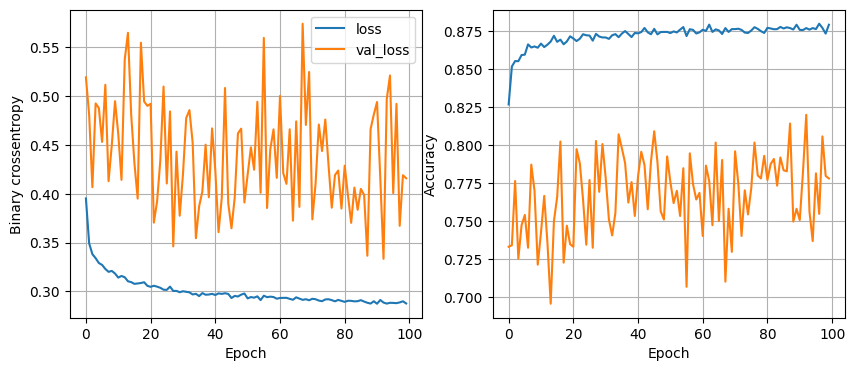

119/119 [==============================] - 0s 745us/step - loss: 0.3293 - accuracy: 0.8699
16 nodes, droupout prob 0, lr 0.01, batch size 64


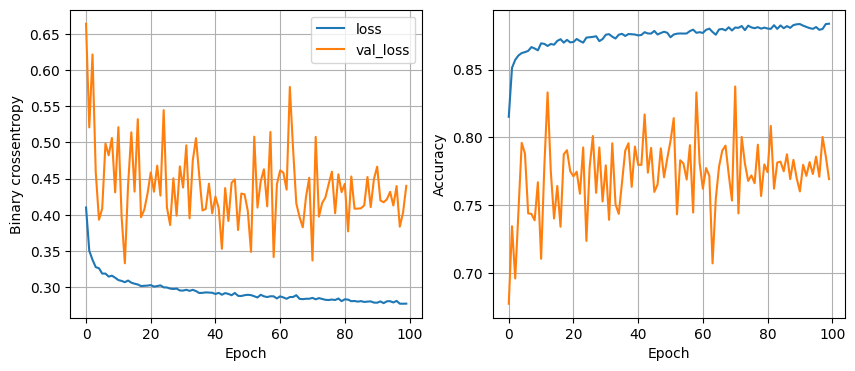

119/119 [==============================] - 0s 814us/step - loss: 0.3226 - accuracy: 0.8722
16 nodes, droupout prob 0, lr 0.01, batch size 128


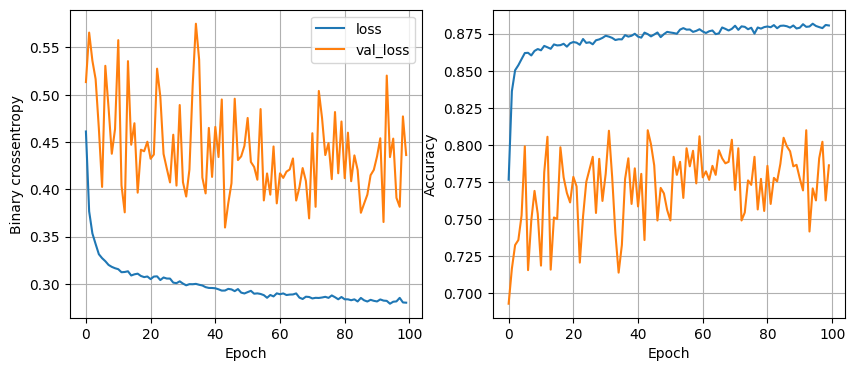

119/119 [==============================] - 0s 867us/step - loss: 0.3152 - accuracy: 0.8743
16 nodes, droupout prob 0, lr 0.005, batch size 32


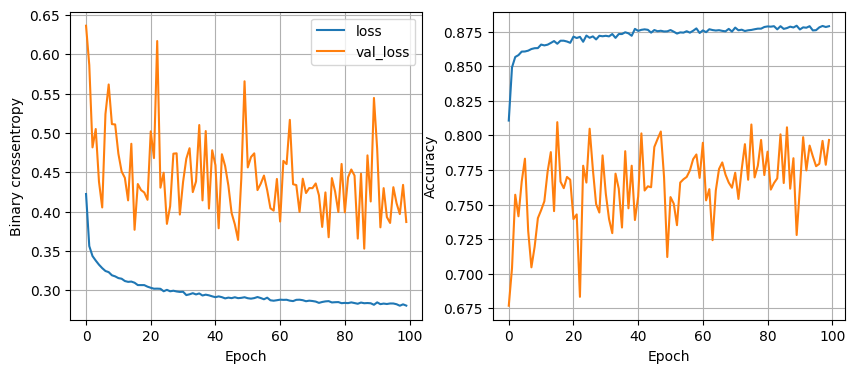

119/119 [==============================] - 0s 696us/step - loss: 0.3228 - accuracy: 0.8657
16 nodes, droupout prob 0, lr 0.005, batch size 64


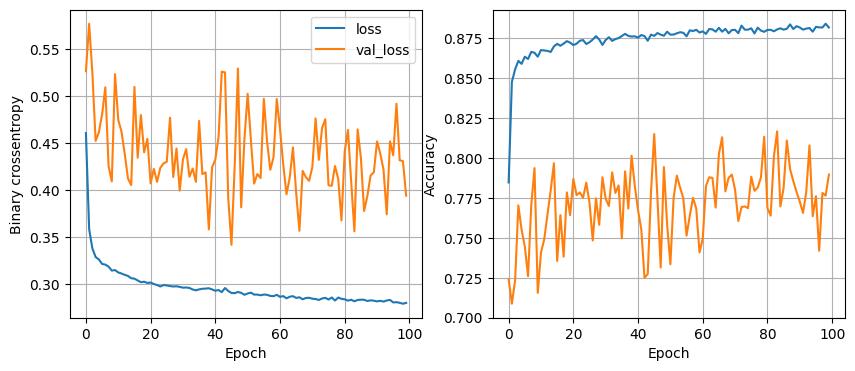

119/119 [==============================] - 0s 1ms/step - loss: 0.3222 - accuracy: 0.8704
16 nodes, droupout prob 0, lr 0.005, batch size 128


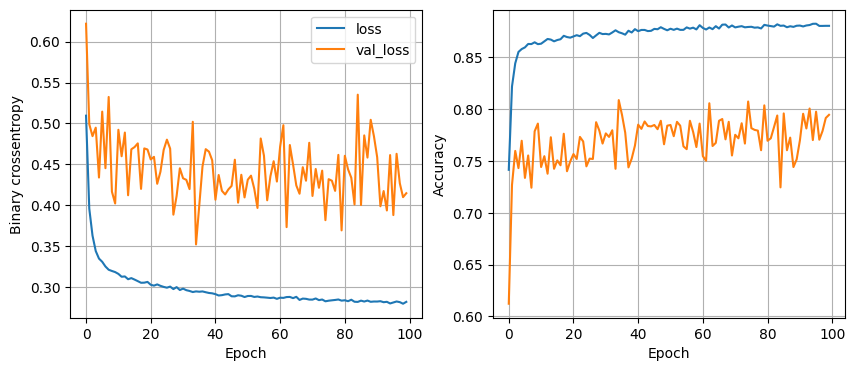

119/119 [==============================] - 0s 2ms/step - loss: 0.3197 - accuracy: 0.8717
16 nodes, droupout prob 0, lr 0.001, batch size 32


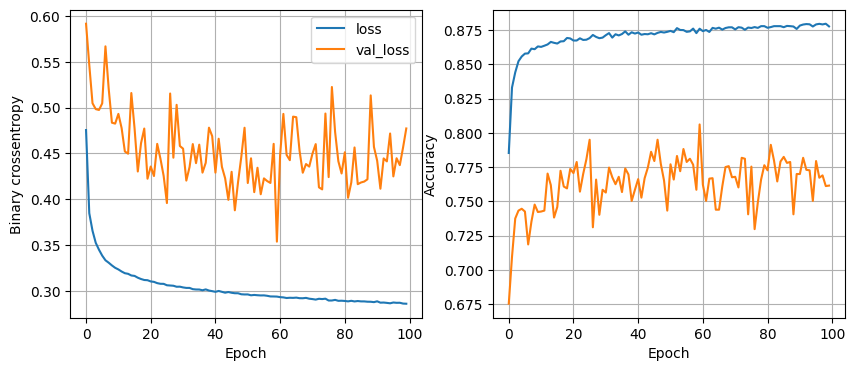

119/119 [==============================] - 0s 1ms/step - loss: 0.3080 - accuracy: 0.8704
16 nodes, droupout prob 0, lr 0.001, batch size 64


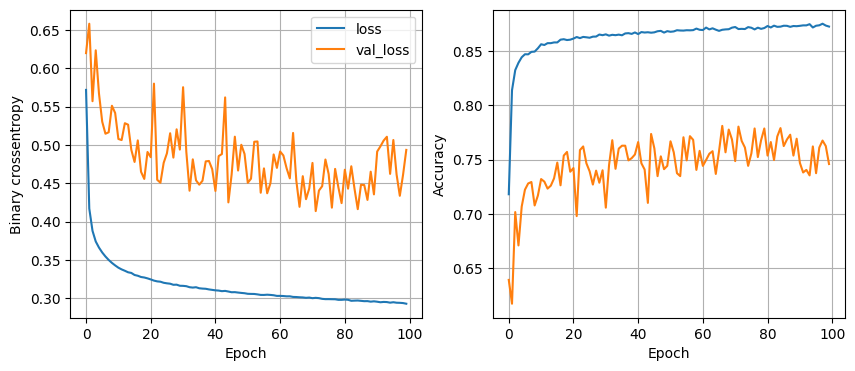

119/119 [==============================] - 0s 2ms/step - loss: 0.3050 - accuracy: 0.8709
16 nodes, droupout prob 0, lr 0.001, batch size 128


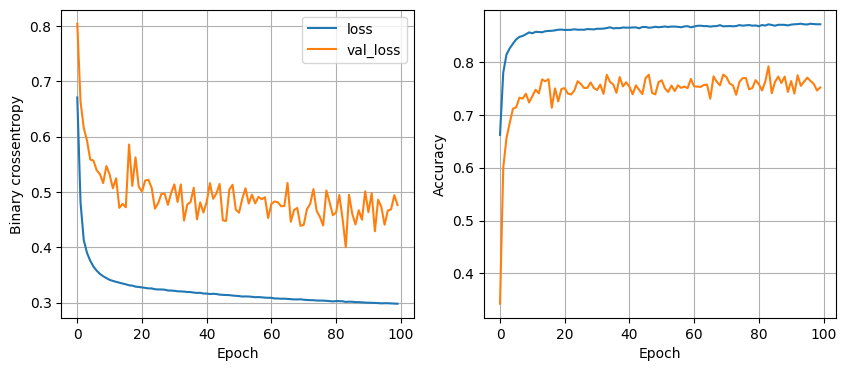

119/119 [==============================] - 0s 2ms/step - loss: 0.3053 - accuracy: 0.8738
16 nodes, droupout prob 0.2, lr 0.01, batch size 32


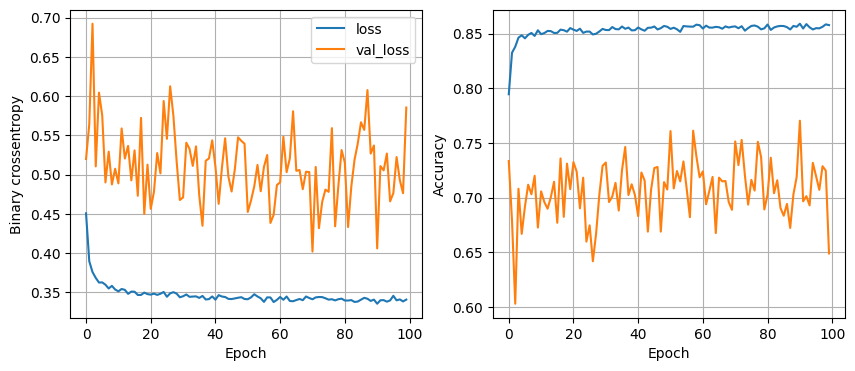

119/119 [==============================] - 0s 2ms/step - loss: 0.3345 - accuracy: 0.8580
16 nodes, droupout prob 0.2, lr 0.01, batch size 64


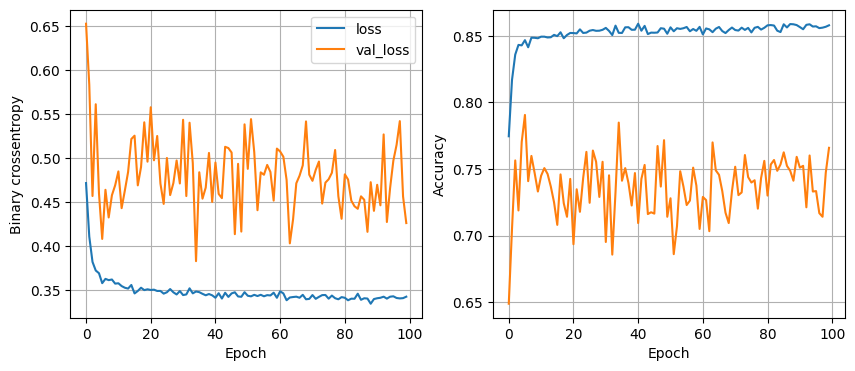

119/119 [==============================] - 0s 1ms/step - loss: 0.3154 - accuracy: 0.8680
16 nodes, droupout prob 0.2, lr 0.01, batch size 128


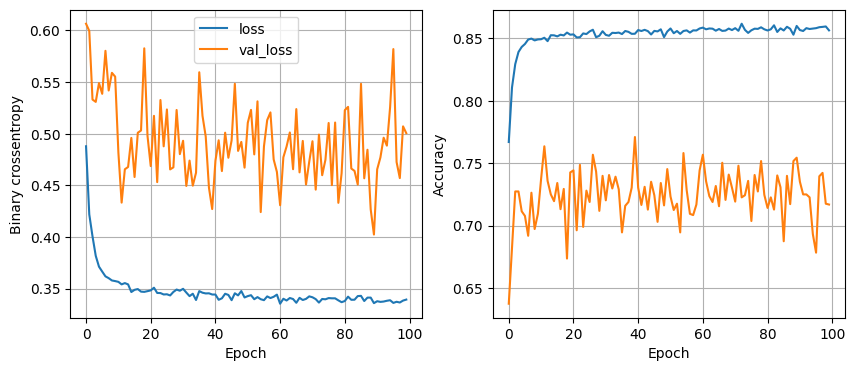

119/119 [==============================] - 0s 1ms/step - loss: 0.3153 - accuracy: 0.8672
16 nodes, droupout prob 0.2, lr 0.005, batch size 32


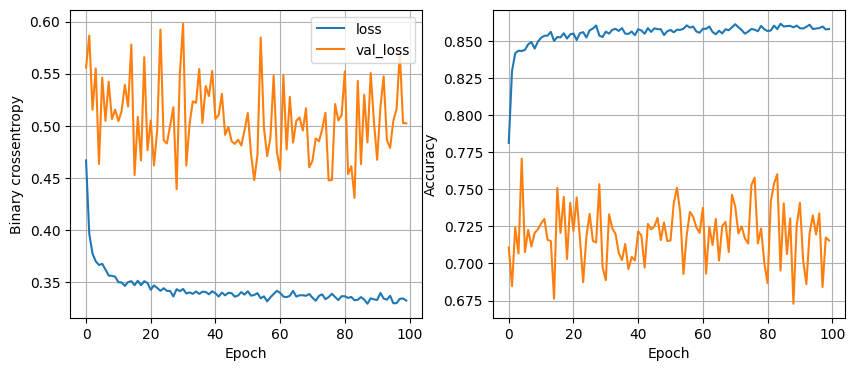

119/119 [==============================] - 0s 2ms/step - loss: 0.3125 - accuracy: 0.8707
16 nodes, droupout prob 0.2, lr 0.005, batch size 64


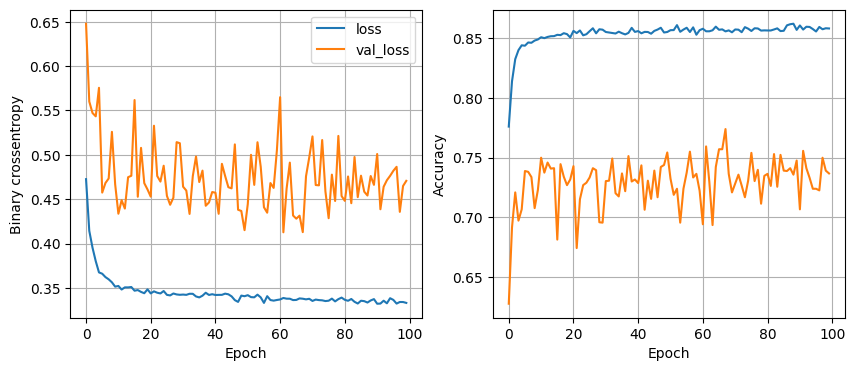

119/119 [==============================] - 0s 1ms/step - loss: 0.3084 - accuracy: 0.8712
16 nodes, droupout prob 0.2, lr 0.005, batch size 128


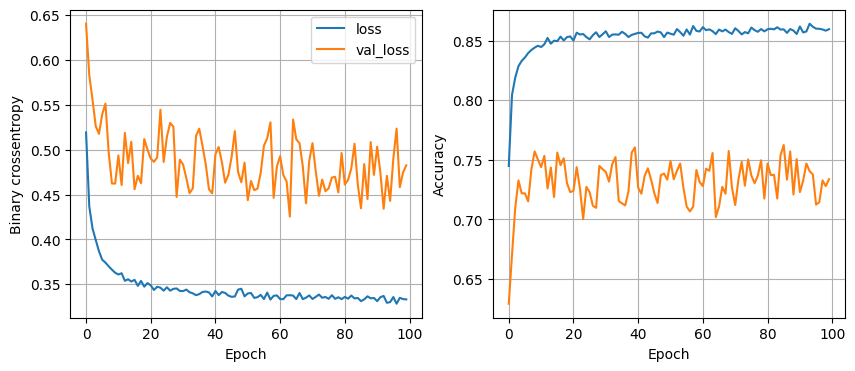

119/119 [==============================] - 0s 1ms/step - loss: 0.3140 - accuracy: 0.8712
16 nodes, droupout prob 0.2, lr 0.001, batch size 32


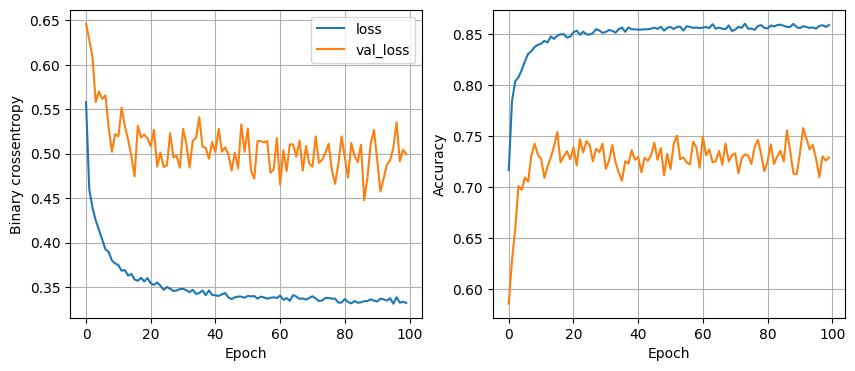

119/119 [==============================] - 0s 1ms/step - loss: 0.3098 - accuracy: 0.8672
16 nodes, droupout prob 0.2, lr 0.001, batch size 64


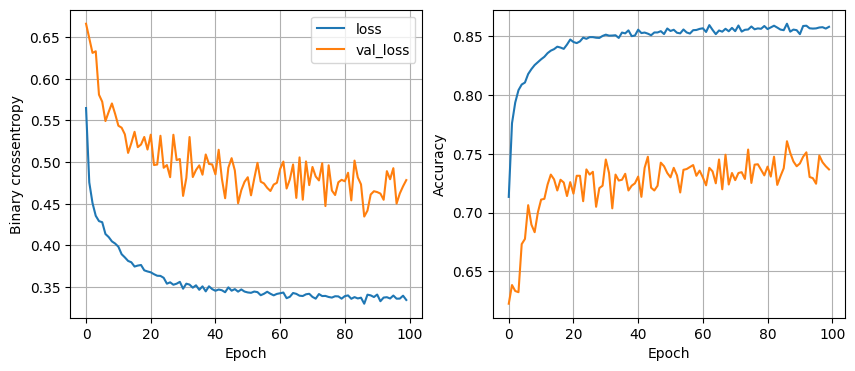

119/119 [==============================] - 0s 3ms/step - loss: 0.3143 - accuracy: 0.8696
16 nodes, droupout prob 0.2, lr 0.001, batch size 128


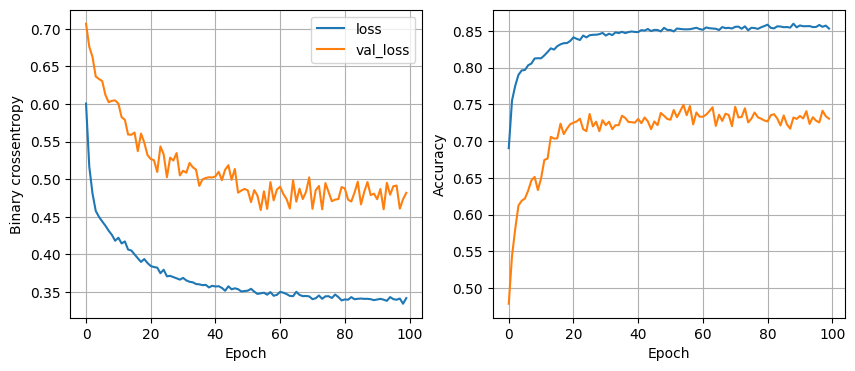

119/119 [==============================] - 0s 2ms/step - loss: 0.3195 - accuracy: 0.8683
32 nodes, droupout prob 0, lr 0.01, batch size 32


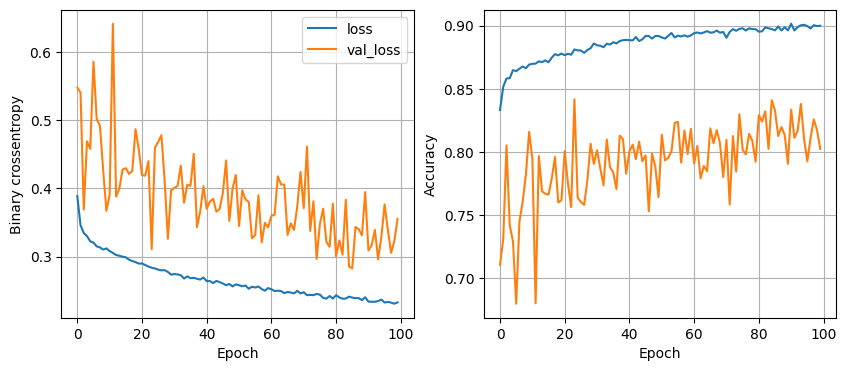

119/119 [==============================] - 0s 3ms/step - loss: 0.4155 - accuracy: 0.8659
32 nodes, droupout prob 0, lr 0.01, batch size 64


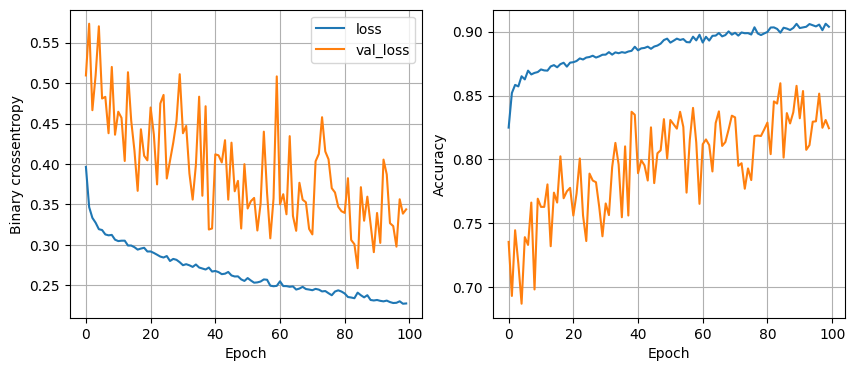

119/119 [==============================] - 0s 3ms/step - loss: 0.3946 - accuracy: 0.8641
32 nodes, droupout prob 0, lr 0.01, batch size 128


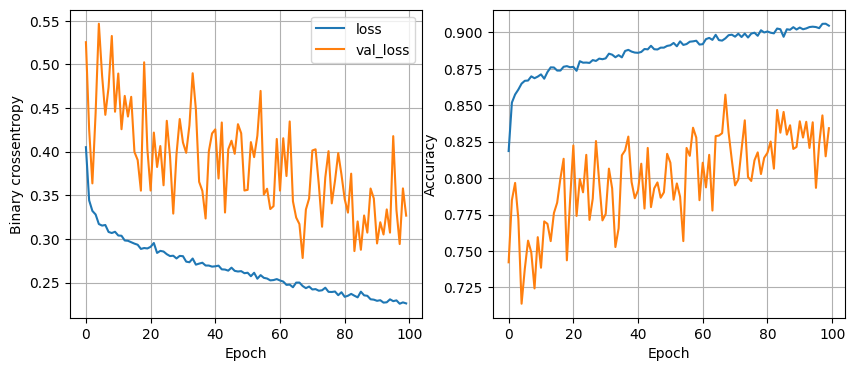

119/119 [==============================] - 0s 3ms/step - loss: 0.3773 - accuracy: 0.8651
32 nodes, droupout prob 0, lr 0.005, batch size 32


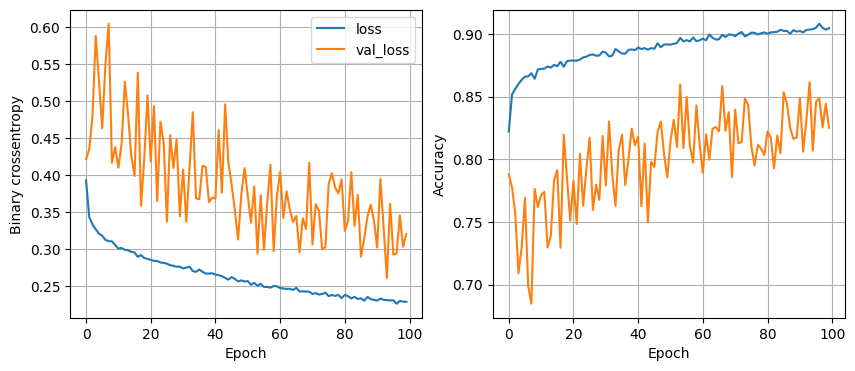

119/119 [==============================] - 0s 3ms/step - loss: 0.3802 - accuracy: 0.8601
32 nodes, droupout prob 0, lr 0.005, batch size 64


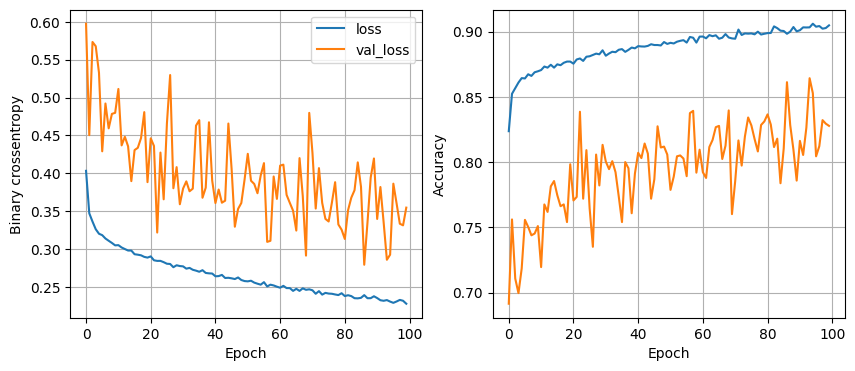

119/119 [==============================] - 0s 2ms/step - loss: 0.3736 - accuracy: 0.8678
32 nodes, droupout prob 0, lr 0.005, batch size 128


In [ ]:
least_val_loss = float('inf')
least_loss_model = None
epochs=100
for num_nodes in [16, 32, 64]:
    for dropout_prob in[0, 0.2]:
        for lr in [0.01, 0.005, 0.001]:
            for batch_size in [32, 64, 128]:
                print(f"{num_nodes} nodes, droupout prob {dropout_prob}, lr {lr}, batch size {batch_size}")
                model, history = train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
                plot_history(history)
                val_loss = model.evaluate(X_valid, y_valid)[0]
                if val_loss < least_val_loss:
                    least_val_loss = val_loss
                    least_loss_model = model